# Quantium customer data analysis

# Import packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt

# Shows plots in jupyter notebook
%matplotlib inline

# Set plot style
sns.set(color_codes=True)

In [2]:
file = pd.ExcelFile(r'C:\Users\NAMEERA\Desktop\Quantium\DE0A5D50.xlsx')

In [3]:
xls=pd.ExcelFile(file)

In [4]:
xls.sheet_names

['in']

In [5]:
transactions = xls.parse(0)

In [6]:
transactions.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


# Summary Statistics

In [7]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   DATE            264836 non-null  datetime64[ns]
 1   STORE_NBR       264836 non-null  int64         
 2   LYLTY_CARD_NBR  264836 non-null  int64         
 3   TXN_ID          264836 non-null  int64         
 4   PROD_NBR        264836 non-null  int64         
 5   PROD_NAME       264836 non-null  object        
 6   PROD_QTY        264836 non-null  int64         
 7   TOT_SALES       264836 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(5), object(1)
memory usage: 16.2+ MB


<AxesSubplot:>

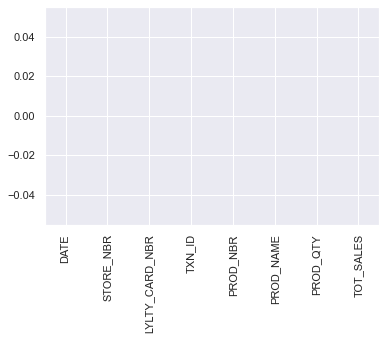

In [8]:
#to inspect missing values in the dataset
transactions.isna().sum().plot(kind='bar')

In [9]:
transactions.PROD_NAME.nunique()

114

In [10]:
transactions.PROD_NAME.unique()

array(['Natural Chip        Compny SeaSalt175g',
       'CCs Nacho Cheese    175g',
       'Smiths Crinkle Cut  Chips Chicken 170g',
       'Smiths Chip Thinly  S/Cream&Onion 175g',
       'Kettle Tortilla ChpsHny&Jlpno Chili 150g',
       'Old El Paso Salsa   Dip Tomato Mild 300g',
       'Smiths Crinkle Chips Salt & Vinegar 330g',
       'Grain Waves         Sweet Chilli 210g',
       'Doritos Corn Chip Mexican Jalapeno 150g',
       'Grain Waves Sour    Cream&Chives 210G',
       'Kettle Sensations   Siracha Lime 150g',
       'Twisties Cheese     270g', 'WW Crinkle Cut      Chicken 175g',
       'Thins Chips Light&  Tangy 175g', 'CCs Original 175g',
       'Burger Rings 220g', 'NCC Sour Cream &    Garden Chives 175g',
       'Doritos Corn Chip Southern Chicken 150g',
       'Cheezels Cheese Box 125g', 'Smiths Crinkle      Original 330g',
       'Infzns Crn Crnchers Tangy Gcamole 110g',
       'Kettle Sea Salt     And Vinegar 175g',
       'Smiths Chip Thinly  Cut Original 175g', 'K

In [11]:
products = transactions['PROD_NAME'].str.split().str.get(-1)
products.value_counts()

175g                  60561
150g                  41633
134g                  25102
110g                  22387
170g                  18502
165g                  15297
330g                  12540
300g                  12041
380g                   6418
200g                   4473
Salt                   3257
Chicken270g            3170
250g                   3169
210g                   3167
Ht300g                 3125
270g                   3115
210G                   3105
90g                    3008
190g                   2995
160g                   2970
220g                   1564
70g                    1507
150G                   1498
Chs&Onion170g          1481
180g                   1468
SeaSalt175g            1468
Chli&S/Cream175G       1461
Chckn175g              1460
125g                   1454
CutSalt/Vinegr175g     1440
Name: PROD_NAME, dtype: int64

In [12]:
import re as re

In [13]:
#To split weight of product from product name
def find_number(text):
    num = re.findall(r'[0-9]+',text)
    return " ".join(num)

In [14]:
transactions['WEIGHT']= transactions['PROD_NAME'].apply(lambda x: find_number(x))

In [15]:
transactions['WEIGHT'].value_counts()

175    66390
150    43131
134    25102
110    22387
170    19983
165    15297
300    15166
330    12540
380     6418
270     6285
210     6272
200     4473
135     3257
250     3169
90      3008
190     2995
160     2970
220     1564
70      1507
180     1468
125     1454
Name: WEIGHT, dtype: int64

In [16]:
#to remove numbers from product name 
def sub_num(text):
    n = re.sub(r'[0-9]+', '', text)
    return "".join(n)

In [17]:
transactions['PRODUCT']= transactions['PROD_NAME'].apply(lambda x: sub_num(x))

In [18]:
transactions['PRODUCT']

0           Natural Chip        Compny SeaSaltg
1                         CCs Nacho Cheese    g
2           Smiths Crinkle Cut  Chips Chicken g
3           Smiths Chip Thinly  S/Cream&Onion g
4         Kettle Tortilla ChpsHny&Jlpno Chili g
                          ...                  
264831     Kettle Sweet Chilli And Sour Cream g
264832               Tostitos Splash Of  Lime g
264833                    Doritos Mexicana    g
264834     Doritos Corn Chip Mexican Jalapeno g
264835               Tostitos Splash Of  Lime g
Name: PRODUCT, Length: 264836, dtype: object

In [19]:
transactions

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,WEIGHT,PRODUCT
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,Natural Chip Compny SeaSaltg
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175,CCs Nacho Cheese g
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170,Smiths Crinkle Cut Chips Chicken g
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175,Smiths Chip Thinly S/Cream&Onion g
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150,Kettle Tortilla ChpsHny&Jlpno Chili g
...,...,...,...,...,...,...,...,...,...,...
264831,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,175,Kettle Sweet Chilli And Sour Cream g
264832,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4,175,Tostitos Splash Of Lime g
264833,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8,170,Doritos Mexicana g
264834,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,150,Doritos Corn Chip Mexican Jalapeno g


In [20]:
transactions['PRODUCT'] =transactions['PRODUCT'].map(lambda x: str(x)[:-1])


In [21]:
transactions

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,WEIGHT,PRODUCT
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,Natural Chip Compny SeaSalt
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175,CCs Nacho Cheese
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170,Smiths Crinkle Cut Chips Chicken
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175,Smiths Chip Thinly S/Cream&Onion
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150,Kettle Tortilla ChpsHny&Jlpno Chili
...,...,...,...,...,...,...,...,...,...,...
264831,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,175,Kettle Sweet Chilli And Sour Cream
264832,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4,175,Tostitos Splash Of Lime
264833,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8,170,Doritos Mexicana
264834,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,150,Doritos Corn Chip Mexican Jalapeno


In [22]:
transactions.isna().sum()

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
WEIGHT            0
PRODUCT           0
dtype: int64

In [23]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   DATE            264836 non-null  datetime64[ns]
 1   STORE_NBR       264836 non-null  int64         
 2   LYLTY_CARD_NBR  264836 non-null  int64         
 3   TXN_ID          264836 non-null  int64         
 4   PROD_NBR        264836 non-null  int64         
 5   PROD_NAME       264836 non-null  object        
 6   PROD_QTY        264836 non-null  int64         
 7   TOT_SALES       264836 non-null  float64       
 8   WEIGHT          264836 non-null  object        
 9   PRODUCT         264836 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(5), object(3)
memory usage: 20.2+ MB


In [24]:
transactions.drop(columns='PROD_NAME',inplace=True)

In [25]:
transactions['WEIGHT'] = transactions['WEIGHT'].astype(int)

In [26]:
transactions.dtypes

DATE              datetime64[ns]
STORE_NBR                  int64
LYLTY_CARD_NBR             int64
TXN_ID                     int64
PROD_NBR                   int64
PROD_QTY                   int64
TOT_SALES                float64
WEIGHT                     int32
PRODUCT                   object
dtype: object

In [27]:
transactions['LYLTY_CARD_NBR'].nunique()

72637

In [28]:
transactions.describe()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES,WEIGHT
count,264836.00000,2.648360e+05,2.648360e+05,264836.000000,264836.000000,264836.000000,264836.000000
mean,135.08011,1.355495e+05,1.351583e+05,56.583157,1.907309,7.304200,182.427004
std,76.78418,8.057998e+04,7.813303e+04,32.826638,0.643654,3.083226,64.327196
min,1.00000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000,70.000000
25%,70.00000,7.002100e+04,6.760150e+04,28.000000,2.000000,5.400000,150.000000
50%,130.00000,1.303575e+05,1.351375e+05,56.000000,2.000000,7.400000,170.000000
75%,203.00000,2.030942e+05,2.027012e+05,85.000000,2.000000,9.200000,175.000000
max,272.00000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000,380.000000


The total number of customers are 72,637 in the dataset.

From the summary statistics given above, the maximum value of the weight column seems quite odd. To check outliers for the columns plotting a boxplot would be the right fit.

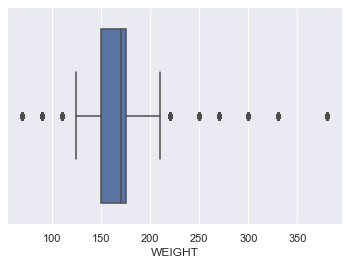

In [29]:
sns.boxplot(x='WEIGHT',data=transactions)
plt.show()

As expected the value above 300 is an outlier.

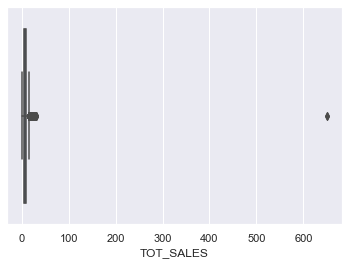

In [30]:
sns.boxplot(x='TOT_SALES',data=transactions)
plt.show()

In [31]:
transactions[transactions['TOT_SALES']>=600]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES,WEIGHT,PRODUCT
69762,2018-08-19,226,226000,226201,4,200,650.0,380,Dorito Corn Chp Supreme
69763,2019-05-20,226,226000,226210,4,200,650.0,380,Dorito Corn Chp Supreme


The same customer loyalty number has made the same purchase a year apart. The customer could be a premium member with a big family. To find this out we could inspect the customer behaviour dataset provided by Quantium. This could also mean human-error in data collection.

In [32]:
cust_behav = pd.read_csv(r'C:\Users\NAMEERA\Desktop\Quantium\QVI_purchase_behaviour.csv')

In [33]:
cust_behav

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream
...,...,...,...
72632,2370651,MIDAGE SINGLES/COUPLES,Mainstream
72633,2370701,YOUNG FAMILIES,Mainstream
72634,2370751,YOUNG FAMILIES,Premium
72635,2370961,OLDER FAMILIES,Budget


In [34]:
#to check the customer details for loyalty card number 226000
cust_behav[cust_behav['LYLTY_CARD_NBR']==226000]

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
59694,226000,OLDER FAMILIES,Premium


Older families - perhaps this purchase was made for a party. Since the customer is a premium member, the customer could be offered a coupon for future purchases. 
- Check for other transactions made by the customer. 

In [35]:
transactions[transactions['LYLTY_CARD_NBR']==226000]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES,WEIGHT,PRODUCT
69762,2018-08-19,226,226000,226201,4,200,650.0,380,Dorito Corn Chp Supreme
69763,2019-05-20,226,226000,226210,4,200,650.0,380,Dorito Corn Chp Supreme


- The customer has made only 2 purchases in the span of one year. 
- Given that this outlier is different by eons to the other transactions, removing the entry would give a better overall summary description of the dataset.

In [36]:
transactions = transactions[transactions['LYLTY_CARD_NBR']!=226000]
transactions

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES,WEIGHT,PRODUCT
0,2018-10-17,1,1000,1,5,2,6.0,175,Natural Chip Compny SeaSalt
1,2019-05-14,1,1307,348,66,3,6.3,175,CCs Nacho Cheese
2,2019-05-20,1,1343,383,61,2,2.9,170,Smiths Crinkle Cut Chips Chicken
3,2018-08-17,2,2373,974,69,5,15.0,175,Smiths Chip Thinly S/Cream&Onion
4,2018-08-18,2,2426,1038,108,3,13.8,150,Kettle Tortilla ChpsHny&Jlpno Chili
...,...,...,...,...,...,...,...,...,...
264831,2019-03-09,272,272319,270088,89,2,10.8,175,Kettle Sweet Chilli And Sour Cream
264832,2018-08-13,272,272358,270154,74,1,4.4,175,Tostitos Splash Of Lime
264833,2018-11-06,272,272379,270187,51,2,8.8,170,Doritos Mexicana
264834,2018-12-27,272,272379,270188,42,2,7.8,150,Doritos Corn Chip Mexican Jalapeno


In [37]:
transactions.describe()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES,WEIGHT
count,264834.000000,2.648340e+05,2.648340e+05,264834.000000,264834.000000,264834.000000,264834.000000
mean,135.079423,1.355488e+05,1.351576e+05,56.583554,1.905813,7.299346,182.425512
std,76.784063,8.057990e+04,7.813292e+04,32.826444,0.343436,2.527241,64.325148
min,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000,70.000000
25%,70.000000,7.002100e+04,6.760050e+04,28.000000,2.000000,5.400000,150.000000
50%,130.000000,1.303570e+05,1.351365e+05,56.000000,2.000000,7.400000,170.000000
75%,203.000000,2.030940e+05,2.026998e+05,85.000000,2.000000,9.200000,175.000000
max,272.000000,2.373711e+06,2.415841e+06,114.000000,5.000000,29.500000,380.000000


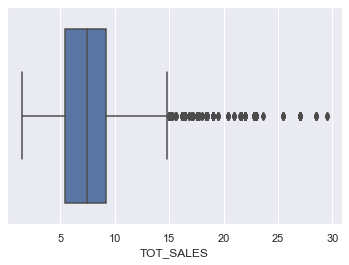

In [38]:
sns.boxplot(x='TOT_SALES',data=transactions)
plt.show()

Dropping the exorbitant outlier which may have been because of human error gives a wider outlook on the transaction distribution through the dataset.

In [39]:
transactions = pd.merge(transactions,cust_behav,on='LYLTY_CARD_NBR')
transactions

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES,WEIGHT,PRODUCT,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,2,6.0,175,Natural Chip Compny SeaSalt,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,3,6.3,175,CCs Nacho Cheese,MIDAGE SINGLES/COUPLES,Budget
2,2018-11-10,1,1307,346,96,2,3.8,160,WW Original Stacked Chips,MIDAGE SINGLES/COUPLES,Budget
3,2019-03-09,1,1307,347,54,1,2.1,175,CCs Original,MIDAGE SINGLES/COUPLES,Budget
4,2019-05-20,1,1343,383,61,2,2.9,170,Smiths Crinkle Cut Chips Chicken,MIDAGE SINGLES/COUPLES,Budget
...,...,...,...,...,...,...,...,...,...,...,...
264829,2019-03-09,272,272319,270088,89,2,10.8,175,Kettle Sweet Chilli And Sour Cream,YOUNG SINGLES/COUPLES,Premium
264830,2018-08-13,272,272358,270154,74,1,4.4,175,Tostitos Splash Of Lime,YOUNG SINGLES/COUPLES,Premium
264831,2018-11-06,272,272379,270187,51,2,8.8,170,Doritos Mexicana,YOUNG SINGLES/COUPLES,Premium
264832,2018-12-27,272,272379,270188,42,2,7.8,150,Doritos Corn Chip Mexican Jalapeno,YOUNG SINGLES/COUPLES,Premium


In [40]:
transactions[transactions['TOT_SALES']>=12]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES,WEIGHT,PRODUCT,LIFESTAGE,PREMIUM_CUSTOMER
5,2018-08-17,2,2373,974,69,5,15.0,175,Smiths Chip Thinly S/Cream&Onion,MIDAGE SINGLES/COUPLES,Budget
6,2018-08-18,2,2426,1038,108,3,13.8,150,Kettle Tortilla ChpsHny&Jlpno Chili,MIDAGE SINGLES/COUPLES,Budget
10,2018-12-12,4,4074,2980,4,2,13.0,380,Dorito Corn Chp Supreme,MIDAGE SINGLES/COUPLES,Budget
37,2018-08-20,8,8294,8221,114,5,23.0,150,Kettle Sensations Siracha Lime,MIDAGE SINGLES/COUPLES,Budget
124,2019-05-15,43,43227,40186,26,4,14.8,134,Pringles Sweet&Spcy BBQ,MIDAGE SINGLES/COUPLES,Budget
...,...,...,...,...,...,...,...,...,...,...,...
264281,2018-10-11,245,245112,247520,4,2,13.0,380,Dorito Corn Chp Supreme,YOUNG SINGLES/COUPLES,Premium
264394,2018-10-08,249,249052,250904,4,2,13.0,380,Dorito Corn Chp Supreme,YOUNG SINGLES/COUPLES,Premium
264578,2018-10-06,259,259056,257776,4,2,13.0,380,Dorito Corn Chp Supreme,YOUNG SINGLES/COUPLES,Premium
264609,2018-08-24,261,261292,260939,4,2,13.0,380,Dorito Corn Chp Supreme,YOUNG SINGLES/COUPLES,Premium


In [41]:
transactions[transactions['TOT_SALES']>=12].value_counts()

DATE        STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  PROD_QTY  TOT_SALES  WEIGHT  PRODUCT                       LIFESTAGE              PREMIUM_CUSTOMER
2018-07-01  110        110215          112879  4         2         13.0       380     Dorito Corn Chp     Supreme   OLDER FAMILIES         Budget              1
2019-03-14  106        106221          108066  4         2         13.0       380     Dorito Corn Chp     Supreme   OLDER SINGLES/COUPLES  Budget              1
2019-03-13  4          4308            4046    4         2         13.0       380     Dorito Corn Chp     Supreme   OLDER SINGLES/COUPLES  Budget              1
            7          7345            7680    4         2         13.0       380     Dorito Corn Chp     Supreme   OLDER FAMILIES         Premium             1
            26         26178           23061   4         2         13.0       380     Dorito Corn Chp     Supreme   YOUNG FAMILIES         Budget              1
                                       

In [42]:
transactions[transactions['TOT_SALES']>=12][['PRODUCT','WEIGHT']].value_counts()

PRODUCT                               WEIGHT
Dorito Corn Chp     Supreme           380       2862
Kettle Mozzarella   Basil & Pesto     175         24
Kettle Original                       175         22
Twisties Cheese                       270         21
Cheezels Cheese                       330         20
                                                ... 
Smiths Chip Thinly  Cut Original      175          2
Red Rock Deli Thai  Chilli&Lime       150          2
Smiths Crinkle Cut  Tomato Salsa      150          1
Smiths Crinkle Cut  Salt & Vinegar    170          1
Smiths Crinkle Cut  French OnionDip   150          1
Length: 94, dtype: int64

The most popular brand has been the Dorito Corn chip supreme, hence the outlier shown in the 'WEIGHT' category. The number of transactions made for Dorito Corn Chip supreme is 2862. It's next best chip brand has only made sales of 0.83% of the total made with Dorito.
- This value count dataset is of the outliers in the total sales, hence denoting that these outliers aren't drawbacks in the dataset.

Now, by analysing the entire transaction dataset for product and weight we would be able to shed light on the most popular and least popular product amongst the customer demographic.

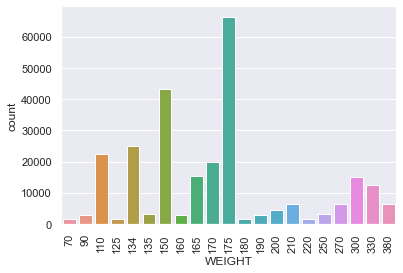

In [43]:
sns.countplot(x=transactions['WEIGHT'])
plt.xticks(rotation='vertical')
plt.show()

The number of transactions made for a product of weight 170g is exorbitant, in essence, to over 60000, following which 150g has a transaction of 40000. 

In [44]:
transactions[['PRODUCT','WEIGHT']].value_counts()

PRODUCT                               WEIGHT
Kettle Mozzarella   Basil & Pesto     175       3304
Kettle Tortilla ChpsHny&Jlpno Chili   150       3296
Cobs Popd Swt/Chlli &Sr/Cream Chips   110       3269
Tyrrells Crisps     Ched & Chives     165       3268
Cobs Popd Sea Salt  Chips             110       3265
                                                ... 
RRD Pc Sea Salt                       165       1431
Woolworths Medium   Salsa             300       1430
NCC Sour Cream &    Garden Chives     175       1419
French Fries Potato Chips             175       1418
WW Crinkle Cut      Original          175       1410
Length: 114, dtype: int64

As it is already evident that chip products of 175g have profitted with the most transaction, the most popular brand amongst customers with the highest transactions is 'Kettle Mozzarella   Basil & Pesto'

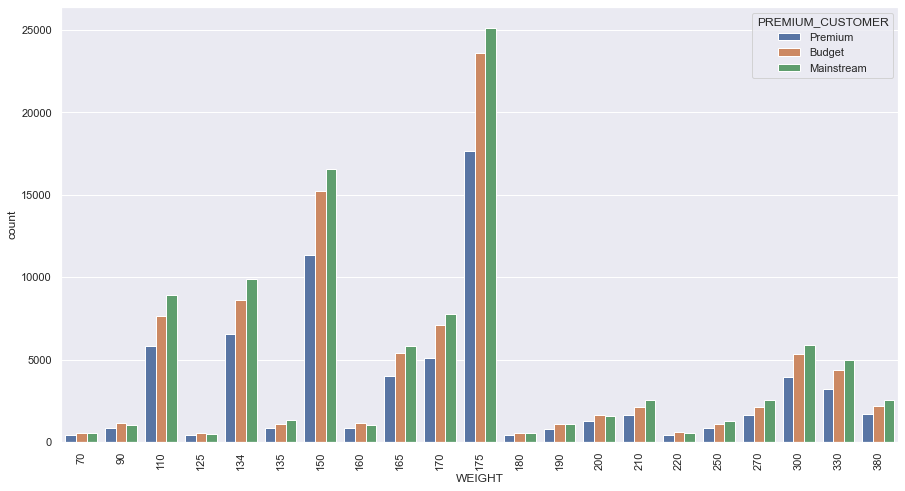

In [45]:
plt.figure(figsize=(15,8))
sns.countplot(x=transactions['WEIGHT'],hue=transactions['PREMIUM_CUSTOMER'])
plt.xticks(rotation='vertical')
plt.show()

Another interesting observation is that customers belonging to the 'Mainstream' category have more or less made the highest number of transactions irrespective of the product. 

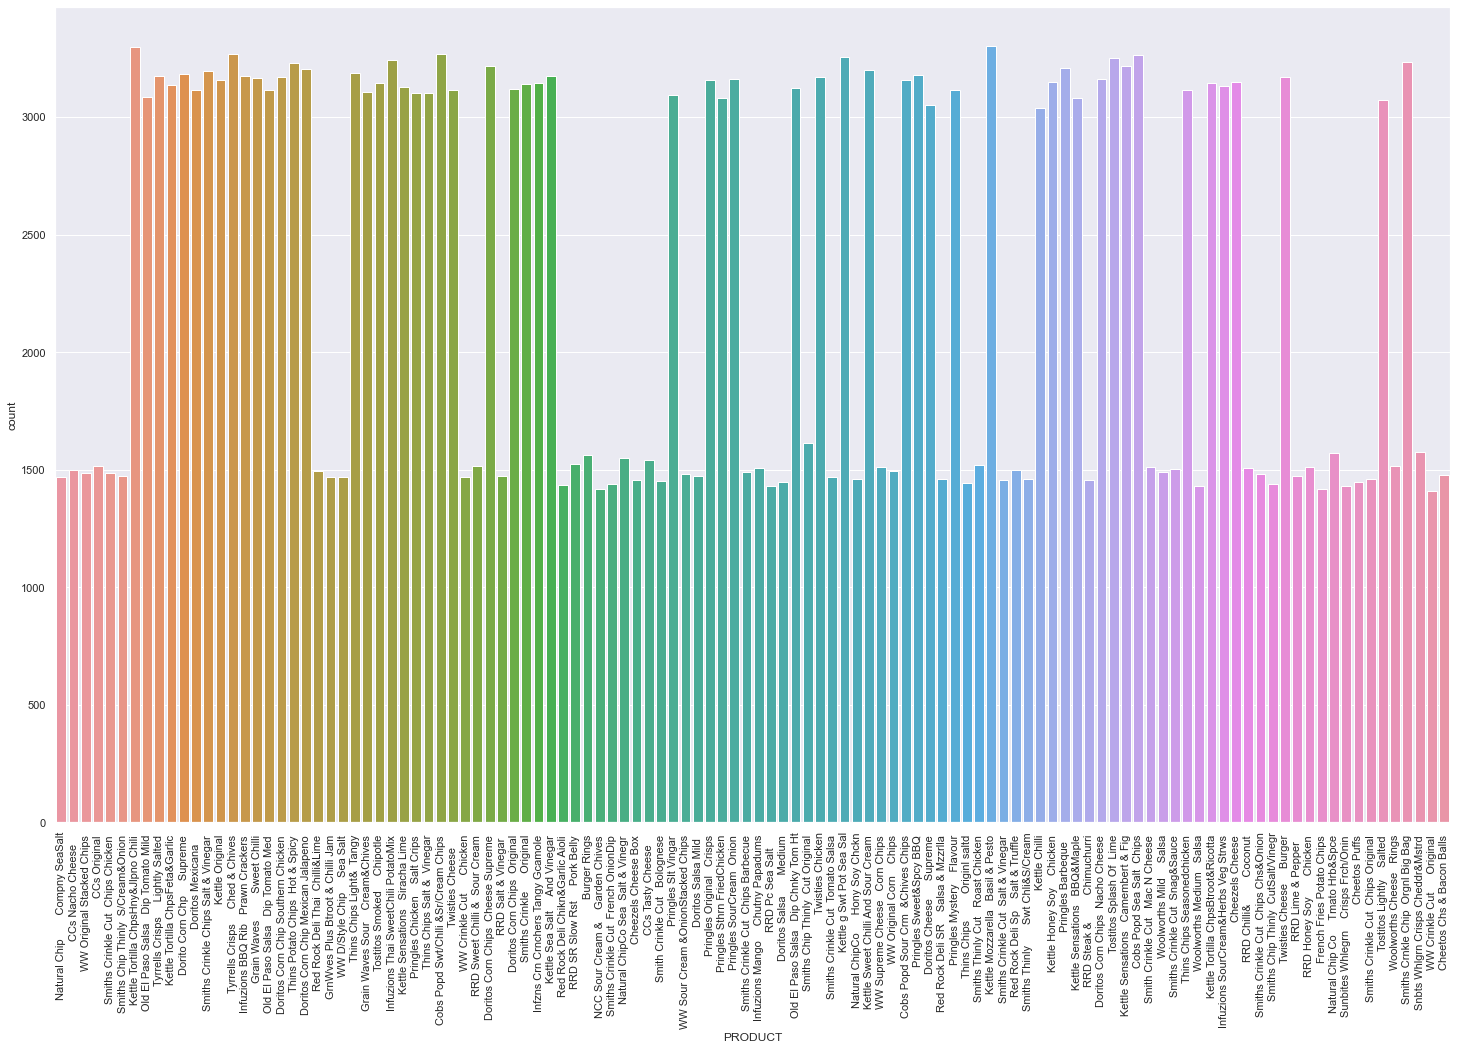

In [46]:
plt.figure(figsize=(25,15))
sns.countplot(x=transactions['PRODUCT'])
plt.xticks(rotation='vertical')
plt.show()

In [47]:
brands = transactions['PRODUCT'].str.split().str.get(0)
brands.value_counts()

Kettle        41288
Smiths        28860
Pringles      25102
Doritos       24962
Thins         14075
RRD           11894
Infuzions     11057
WW            10320
Cobs           9693
Tostitos       9471
Twisties       9454
Old            9324
Tyrrells       6442
Grain          6272
Natural        6050
Red            5885
Cheezels       4603
CCs            4551
Woolworths     4437
Dorito         3183
Infzns         3144
Smith          2963
Cheetos        2927
Snbts          1576
Burger         1564
GrnWves        1468
Sunbites       1432
NCC            1419
French         1418
Name: PRODUCT, dtype: int64

The brand names in the product column will need some cleaning since there may be a possibility of name repetition and spelling errors, for instance, 'Doritos' and 'Dorito' are of the same brand. Hence, cleaning the dataset.

In [48]:
#Cleaning brand names 
transactions['BRAND']=brands
transactions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 264834 entries, 0 to 264833
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   DATE              264834 non-null  datetime64[ns]
 1   STORE_NBR         264834 non-null  int64         
 2   LYLTY_CARD_NBR    264834 non-null  int64         
 3   TXN_ID            264834 non-null  int64         
 4   PROD_NBR          264834 non-null  int64         
 5   PROD_QTY          264834 non-null  int64         
 6   TOT_SALES         264834 non-null  float64       
 7   WEIGHT            264834 non-null  int32         
 8   PRODUCT           264834 non-null  object        
 9   LIFESTAGE         264834 non-null  object        
 10  PREMIUM_CUSTOMER  264834 non-null  object        
 11  BRAND             264834 non-null  object        
dtypes: datetime64[ns](1), float64(1), int32(1), int64(5), object(4)
memory usage: 33.3+ MB


In [49]:
transactions['BRAND']= transactions['BRAND'].str.upper()
transactions.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES,WEIGHT,PRODUCT,LIFESTAGE,PREMIUM_CUSTOMER,BRAND
0,2018-10-17,1,1000,1,5,2,6.0,175,Natural Chip Compny SeaSalt,YOUNG SINGLES/COUPLES,Premium,NATURAL
1,2019-05-14,1,1307,348,66,3,6.3,175,CCs Nacho Cheese,MIDAGE SINGLES/COUPLES,Budget,CCS
2,2018-11-10,1,1307,346,96,2,3.8,160,WW Original Stacked Chips,MIDAGE SINGLES/COUPLES,Budget,WW
3,2019-03-09,1,1307,347,54,1,2.1,175,CCs Original,MIDAGE SINGLES/COUPLES,Budget,CCS
4,2019-05-20,1,1343,383,61,2,2.9,170,Smiths Crinkle Cut Chips Chicken,MIDAGE SINGLES/COUPLES,Budget,SMITHS


In [50]:
brand_names = {"RED":'RRD',"SNBTS":"SUNBITES","INFZNS":"INFUZIONS","WW":"WOOLWORTHS","SMITH":"SMITHS","NCC":"NATURAL","DORITO":"DORITOS","GRAIN":"GRNWVES"}
transactions['BRAND'].replace(brand_names,inplace=True)

In [51]:
transactions['BRAND'].value_counts()

KETTLE        41288
SMITHS        31823
DORITOS       28145
PRINGLES      25102
RRD           17779
WOOLWORTHS    14757
INFUZIONS     14201
THINS         14075
COBS           9693
TOSTITOS       9471
TWISTIES       9454
OLD            9324
GRNWVES        7740
NATURAL        7469
TYRRELLS       6442
CHEEZELS       4603
CCS            4551
SUNBITES       3008
CHEETOS        2927
BURGER         1564
FRENCH         1418
Name: BRAND, dtype: int64

In [52]:
#To groupby transactions by customer loyalty card number
sum_of_trans = transactions.groupby(['LYLTY_CARD_NBR']).agg({'TXN_ID':'count',"TOT_SALES":'sum','PRODUCT':'count'})
sum_of_trans

,TXN_ID,TOT_SALES,PRODUCT
LYLTY_CARD_NBR,,,
1000,1,6.0,1
1002,1,2.7,1
1003,2,6.6,2
1004,1,1.9,1
1005,1,2.8,1
...,...,...,...
2370651,1,13.0,1
2370701,1,7.2,1
2370751,1,9.2,1


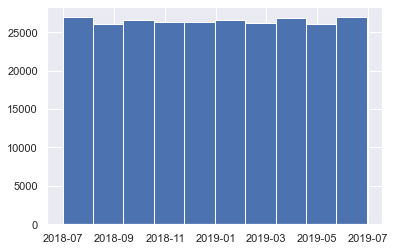

In [53]:
plt.hist(transactions['DATE'].dropna())
plt.show()


The number of transactions has fairly been equal ( approx. 25000) every 2 months.

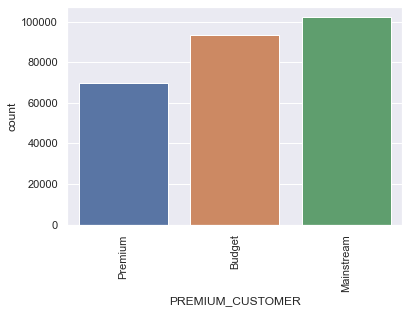

In [54]:
sns.countplot(x=transactions['PREMIUM_CUSTOMER'])
plt.xticks(rotation='vertical')
plt.show()

In [55]:
#TO calculate the percentage of premium customers with the category of lifestage 
#to plot stacked bars
def plot_stacked_bars(dataframe,title_,size_=(18,10),rot_=0,legend_='upper right'):
    """ To plot stacked bars for the number of companies or clients who 
    have churned """

    ax= dataframe.plot(
    kind="bar",
    stacked=True,
    figsize=size_,
    rot=rot_,
    title=title_
    )
    # Annotate bars
    annotate_stacked_bars(ax, textsize=14)
    # Rename legend
    plt.legend(["Premium", "Budget","Mainstream"], loc=legend_) 
                # Labels
    plt.ylabel("Company base (%)")
    plt.show()

def annotate_stacked_bars(ax, pad=0.99, colour="white", textsize=13):
    """
    Add value annotations to the bars
    """

    # Iterate over the plotted rectanges/bars
    for p in ax.patches:
        
        # Calculate annotation
        value = str(round(p.get_height(),1))
        # If value is 0 do not annotate
        if value == '0.0':
            continue
        ax.annotate(
            value,
            ((p.get_x()+ p.get_width()/2)*pad-0.05, (p.get_y()+p.get_height()/2)*pad),
            color=colour,
            size=textsize
        )
    
   


In [56]:
premium_lifestage = transactions.groupby([transactions['LIFESTAGE'],transactions['PREMIUM_CUSTOMER']])['LYLTY_CARD_NBR'].count().unstack(level=0)

In [57]:
tot_life= premium_lifestage/premium_lifestage.sum() * 100

In [58]:
tot_life

LIFESTAGE,MIDAGE SINGLES/COUPLES,NEW FAMILIES,OLDER FAMILIES,OLDER SINGLES/COUPLES,RETIREES,YOUNG FAMILIES,YOUNG SINGLES/COUPLES
PREMIUM_CUSTOMER,,,,,,,
Budget,19.992035,43.431132,47.660205,33.787331,30.546792,43.865847,25.406163
Mainstream,47.287933,33.603122,29.312261,33.623965,43.136467,29.608644,57.327432
Premium,32.720032,22.965746,23.027534,32.588704,26.316741,26.525509,17.266405


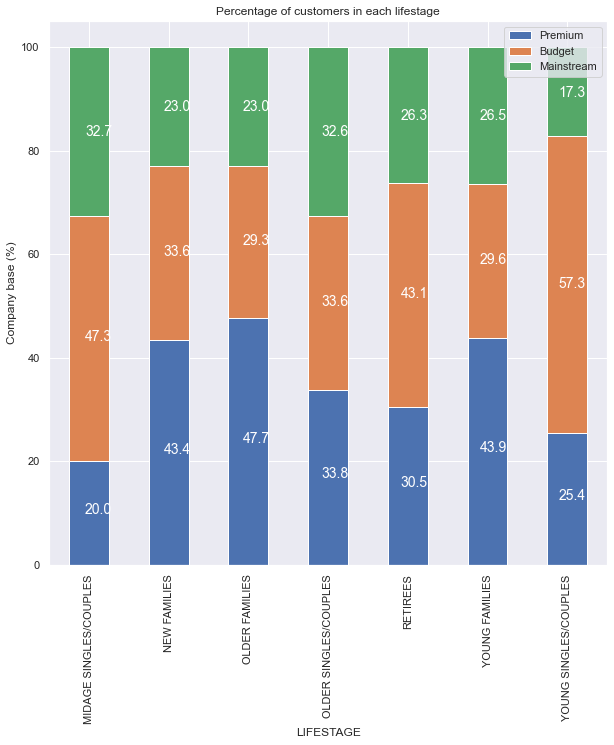

In [59]:
plot_stacked_bars(tot_life.transpose(),'Percentage of customers in each lifestage',(10,10),rot_=90)

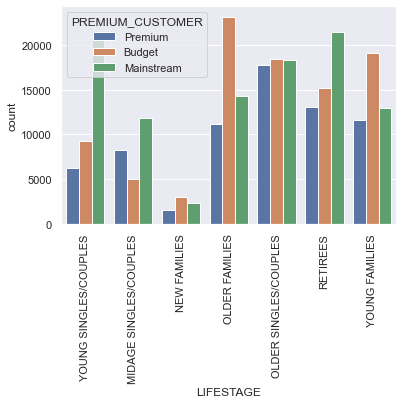

In [60]:
sns.countplot(x=transactions['LIFESTAGE'], hue=transactions['PREMIUM_CUSTOMER'])
plt.xticks(rotation='vertical')
plt.show()

C:\Users\NAMEERA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


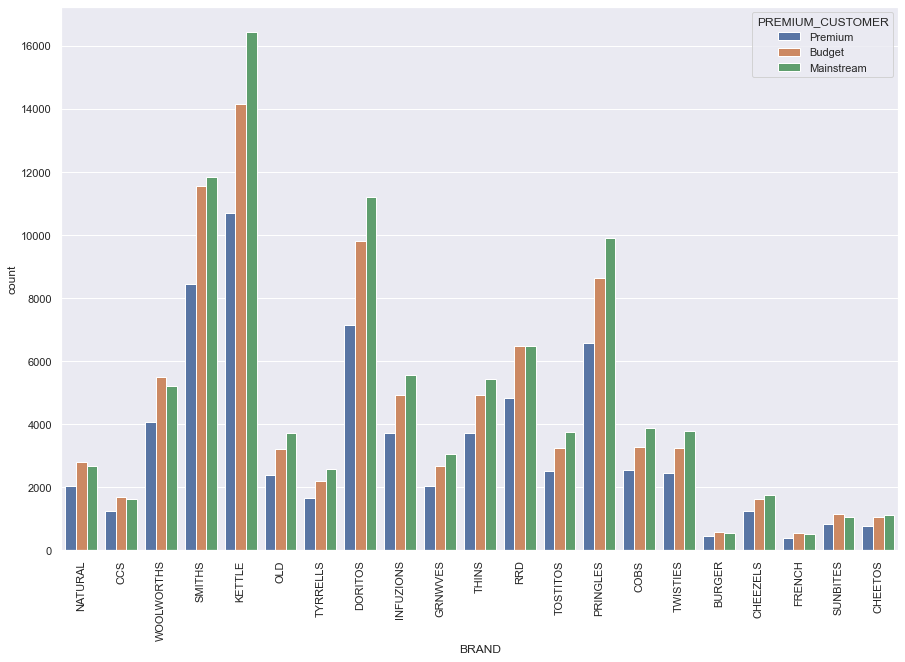

In [61]:
#premium customer affinity to specific products
plt.figure(figsize=(15,10))
sns.countplot(transactions['BRAND'],hue=transactions['PREMIUM_CUSTOMER'])
plt.xticks(rotation='vertical')
plt.show()

As mentioned earlier, the most popular brand amongst the customers is KETTLE with Mainstream customers purchasing it the most, transactions of over 160,000.
- To check customer demographic's inclination towards brands

# Data Mining 

In [62]:
quantity = transactions[['LYLTY_CARD_NBR','LIFESTAGE','PREMIUM_CUSTOMER','PROD_QTY']]
quantity

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,PROD_QTY
0,1000,YOUNG SINGLES/COUPLES,Premium,2
1,1307,MIDAGE SINGLES/COUPLES,Budget,3
2,1307,MIDAGE SINGLES/COUPLES,Budget,2
3,1307,MIDAGE SINGLES/COUPLES,Budget,1
4,1343,MIDAGE SINGLES/COUPLES,Budget,2
...,...,...,...,...
264829,272319,YOUNG SINGLES/COUPLES,Premium,2
264830,272358,YOUNG SINGLES/COUPLES,Premium,1
264831,272379,YOUNG SINGLES/COUPLES,Premium,2
264832,272379,YOUNG SINGLES/COUPLES,Premium,2


In [63]:
quantity['BRAND']=transactions['BRAND']
quantity

<ipython-input-63-e2470372d146>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quantity['BRAND']=transactions['BRAND']


,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,PROD_QTY,BRAND
0,1000,YOUNG SINGLES/COUPLES,Premium,2,NATURAL
1,1307,MIDAGE SINGLES/COUPLES,Budget,3,CCS
2,1307,MIDAGE SINGLES/COUPLES,Budget,2,WOOLWORTHS
3,1307,MIDAGE SINGLES/COUPLES,Budget,1,CCS
4,1343,MIDAGE SINGLES/COUPLES,Budget,2,SMITHS
...,...,...,...,...,...
264829,272319,YOUNG SINGLES/COUPLES,Premium,2,KETTLE
264830,272358,YOUNG SINGLES/COUPLES,Premium,1,TOSTITOS
264831,272379,YOUNG SINGLES/COUPLES,Premium,2,DORITOS
264832,272379,YOUNG SINGLES/COUPLES,Premium,2,DORITOS


In [64]:
quantity.dtypes

LYLTY_CARD_NBR       int64
LIFESTAGE           object
PREMIUM_CUSTOMER    object
PROD_QTY             int64
BRAND               object
dtype: object

In [65]:
quantity['PROD_QTY']= quantity['PROD_QTY'].astype('int32')

<ipython-input-65-be07beafe234>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quantity['PROD_QTY']= quantity['PROD_QTY'].astype('int32')


In [66]:
quantity.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,PROD_QTY,BRAND
0,1000,YOUNG SINGLES/COUPLES,Premium,2,NATURAL
1,1307,MIDAGE SINGLES/COUPLES,Budget,3,CCS
2,1307,MIDAGE SINGLES/COUPLES,Budget,2,WOOLWORTHS
3,1307,MIDAGE SINGLES/COUPLES,Budget,1,CCS
4,1343,MIDAGE SINGLES/COUPLES,Budget,2,SMITHS


In [67]:
quantity['TXN_ID']= transactions['TXN_ID']

<ipython-input-67-d6e40be0f05a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quantity['TXN_ID']= transactions['TXN_ID']


In [68]:
quantity.dtypes

LYLTY_CARD_NBR       int64
LIFESTAGE           object
PREMIUM_CUSTOMER    object
PROD_QTY             int32
BRAND               object
TXN_ID               int64
dtype: object

# Affinity analysis using apriori algorithm

In [69]:
import numpy as np
import pandas as pd
from mlxtend.frequent_patterns import apriori


In [71]:
#one-hot-encoding to transform values
def hot_encode(x):
    if(x<= 0):
        return 0
    if(x>= 1):
        return 1

In [74]:
basket_young_mainstream = (quantity[(quantity['LIFESTAGE'] =="YOUNG SINGLES/COUPLES") & (quantity['PREMIUM_CUSTOMER']=='Mainstream')]
          .groupby(['TXN_ID','BRAND'])['PROD_QTY']
          .sum().unstack().reset_index().fillna(0)
          .set_index('TXN_ID'))

In [75]:
basket_encoded_mainstream = basket_young_mainstream.applymap(hot_encode)
basket_young_mainstream = basket_encoded_mainstream

In [76]:
frq_items_m = apriori(basket_young_mainstream, min_support = 0.01, use_colnames = True).sort_values('support', ascending =False)
 
frq_items_m['length']= frq_items_m['itemsets'].apply(lambda x: len(x))

In [100]:
frq_items_m

,support,itemsets,length
6,0.184959,(KETTLE),1
3,0.122215,(DORITOS),1
9,0.111389,(PRINGLES),1
11,0.095607,(SMITHS),1
5,0.060097,(INFUZIONS),1
12,0.056104,(THINS),1
10,0.046625,(RRD),1
14,0.043305,(TWISTIES),1
13,0.042823,(TOSTITOS),1
8,0.041717,(OLD),1


From the analysis using apriori algorithm above, Young singles/couples with a mainstream membership are likely to purchase KETTLE, followed by DORITOS, PRINGLES AND SMITHS. 

KETTLE is a brand that is likely to be purchased by the other customers.
- To analyse further for other customers belonging to mainstream:

In [80]:
basket_other_m = (quantity[(~(quantity['LIFESTAGE'] =="YOUNG SINGLES/COUPLES")) & (quantity['PREMIUM_CUSTOMER']=='Mainstream')]
          .groupby(['TXN_ID','BRAND'])['PROD_QTY']
          .sum().unstack().reset_index().fillna(0)
          .set_index('TXN_ID'))

In [81]:
basket_encoded_other_m = basket_other_m.applymap(hot_encode)
basket_other_m = basket_encoded_other_m

frq_items_o_m = apriori(basket_other_m, min_support = 0.01, use_colnames = True).sort_values('support', ascending =False)
 
frq_items_o_m['length']= frq_items_o_m['itemsets'].apply(lambda x: len(x))
frq_items_o_m

,support,itemsets,length
7,0.155918,(KETTLE),1
12,0.122171,(SMITHS),1
4,0.107295,(DORITOS),1
10,0.094132,(PRINGLES),1
11,0.068077,(RRD),1
18,0.056948,(WOOLWORTHS),1
6,0.053337,(INFUZIONS),1
14,0.052953,(THINS),1
3,0.037519,(COBS),1
16,0.035782,(TWISTIES),1


In [103]:
affinity_support = pd.merge(frq_items_m,frq_items_o_m, on= 'itemsets')

In [106]:
affinity_support

,support_x,itemsets,length_x,support_y,length_y
0,0.184959,(KETTLE),1,0.155918,1
1,0.122215,(DORITOS),1,0.107295,1
2,0.111389,(PRINGLES),1,0.094132,1
3,0.095607,(SMITHS),1,0.122171,1
4,0.060097,(INFUZIONS),1,0.053337,1
5,0.056104,(THINS),1,0.052953,1
6,0.046625,(RRD),1,0.068077,1
7,0.043305,(TWISTIES),1,0.035782,1
8,0.042823,(TOSTITOS),1,0.035310,1
9,0.041717,(OLD),1,0.035459,1


In [107]:
affinity_support.drop(columns=['length_x','length_y'],inplace=True)

In [108]:
affinity_support

,support_x,itemsets,support_y
0,0.184959,(KETTLE),0.155918
1,0.122215,(DORITOS),0.107295
2,0.111389,(PRINGLES),0.094132
3,0.095607,(SMITHS),0.122171
4,0.060097,(INFUZIONS),0.053337
5,0.056104,(THINS),0.052953
6,0.046625,(RRD),0.068077
7,0.043305,(TWISTIES),0.035782
8,0.042823,(TOSTITOS),0.035310
9,0.041717,(OLD),0.035459


In [109]:
affinity_support['Brand Affinity'] = affinity_support['support_x']/affinity_support['support_y']

In [110]:
affinity_support = pd.DataFrame(affinity_support.groupby('itemsets')['Brand Affinity'].sum())

In [112]:
affinity_support.sort_values(by='Brand Affinity',ascending = False)

,Brand Affinity
itemsets,
(TYRRELLS),1.222295
(TOSTITOS),1.212780
(TWISTIES),1.210247
(KETTLE),1.186256
(PRINGLES),1.183335
(OLD),1.176478
(DORITOS),1.139055
(INFUZIONS),1.126735
(COBS),1.108048


# Alternative affinity analysis 

In [82]:
#target and nontarget dataframe subsets
target = transactions.loc[(transactions['LIFESTAGE']=='YOUNG SINGLES/COUPLES') & (transactions['PREMIUM_CUSTOMER']=='Mainstream'),:]
non_target= transactions.loc[~((transactions['LIFESTAGE']=='YOUNG SINGLES/COUPLES') & (transactions['PREMIUM_CUSTOMER']=='Mainstream')),:]

In [83]:
target.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES,WEIGHT,PRODUCT,LIFESTAGE,PREMIUM_CUSTOMER,BRAND
237700,2018-08-16,1,1020,26,19,1,2.6,150,Smiths Crinkle Cut Snag&Sauce,YOUNG SINGLES/COUPLES,Mainstream,SMITHS
237701,2018-10-02,1,1020,27,7,1,5.7,330,Smiths Crinkle Original,YOUNG SINGLES/COUPLES,Mainstream,SMITHS
237702,2019-05-02,1,1020,28,84,1,3.1,180,GrnWves Plus Btroot & Chilli Jam,YOUNG SINGLES/COUPLES,Mainstream,GRNWVES
237703,2018-08-17,1,1163,188,46,1,5.4,175,Kettle Original,YOUNG SINGLES/COUPLES,Mainstream,KETTLE
237704,2019-02-07,1,1163,189,12,1,3.0,175,Natural Chip Co Tmato Hrb&Spce,YOUNG SINGLES/COUPLES,Mainstream,NATURAL


In [84]:
non_target.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES,WEIGHT,PRODUCT,LIFESTAGE,PREMIUM_CUSTOMER,BRAND
0,2018-10-17,1,1000,1,5,2,6.0,175,Natural Chip Compny SeaSalt,YOUNG SINGLES/COUPLES,Premium,NATURAL
1,2019-05-14,1,1307,348,66,3,6.3,175,CCs Nacho Cheese,MIDAGE SINGLES/COUPLES,Budget,CCS
2,2018-11-10,1,1307,346,96,2,3.8,160,WW Original Stacked Chips,MIDAGE SINGLES/COUPLES,Budget,WOOLWORTHS
3,2019-03-09,1,1307,347,54,1,2.1,175,CCs Original,MIDAGE SINGLES/COUPLES,Budget,CCS
4,2019-05-20,1,1343,383,61,2,2.9,170,Smiths Crinkle Cut Chips Chicken,MIDAGE SINGLES/COUPLES,Budget,SMITHS


In [85]:
#targetting brand affinities 
targetbrand = target.loc[:,('PROD_QTY','BRAND')]
targetsum = targetbrand['PROD_QTY'].sum()
targetbrand['target affinity to brand'] = targetbrand['PROD_QTY']/targetsum
targetbrand = pd.DataFrame(targetbrand.groupby('BRAND')['target affinity to brand'].sum())

In [86]:
nontarget_brand = non_target.loc[:,('PROD_QTY','BRAND')]
nontarget_sum = nontarget_brand['PROD_QTY'].sum()
nontarget_brand['Non target affinity to brand'] = nontarget_brand['PROD_QTY']/nontarget_sum
nontarget_brand = pd.DataFrame(nontarget_brand.groupby('BRAND')['Non target affinity to brand'].sum())

#merging the dataframe 
affinity = pd.merge(targetbrand,nontarget_brand, left_index=True, right_index=True)
affinity.head()

,target affinity to brand,Non target affinity to brand
BRAND,,
BURGER,0.002744,0.006145
CCS,0.010484,0.017602
CHEETOS,0.007533,0.011240
CHEEZELS,0.016851,0.017370
COBS,0.041856,0.036375


In [87]:
#brand affinity proportions
affinity['Affinity to brand']= affinity['target affinity to brand']/affinity['Non target affinity to brand']
affinity.sort_values(by = 'Affinity to brand', ascending = False)

,target affinity to brand,Non target affinity to brand,Affinity to brand
BRAND,,,
TYRRELLS,0.029587,0.023933,1.236235
TWISTIES,0.043306,0.035283,1.227401
KETTLE,0.185649,0.154216,1.203823
TOSTITOS,0.042581,0.035377,1.203638
OLD,0.041598,0.034753,1.196958
PRINGLES,0.111980,0.093743,1.194536
DORITOS,0.122877,0.105277,1.167176
COBS,0.041856,0.036375,1.150700
INFUZIONS,0.060649,0.053157,1.140947


- TYRRELLS is the most favoured brand by Young couples/singles with Mainstream membership with a 23.6% likelihood of purchase.
- BURGER RINGS remains as the least favoured purchases by Young couples/singles with a Mainstream membership and 56.4% less likely to purchase it.

# Affinity to pack size 

In [88]:
targetpack_size= target.loc[:,('WEIGHT','PROD_QTY')]
targetpack_sum = targetpack_size['PROD_QTY'].sum()
targetpack_size['target affinity to pack size'] = targetpack_size['PROD_QTY']/targetpack_sum
targetpack_size = pd.DataFrame(targetpack_size.groupby('WEIGHT')['target affinity to pack size'].sum())

ntargetpack_size = non_target.loc[:, ['WEIGHT', 'PROD_QTY']]
ntargetpack_sum = ntargetpack_size['PROD_QTY'].sum()
ntargetpack_size['Non-target affinity to pack size'] = ntargetpack_size['PROD_QTY'] / ntargetpack_sum
ntargetpack_size = pd.DataFrame(ntargetpack_size.groupby('WEIGHT')['Non-target affinity to pack size'].sum())

In [89]:
#merging the dataframe 
affinity_packsize = pd.merge(targetpack_size, ntargetpack_size, left_index = True , right_index= True)
affinity_packsize.head()

,target affinity to pack size,Non-target affinity to pack size
WEIGHT,,
70,0.002847,0.005889
90,0.005954,0.011719
110,0.099658,0.083642
125,0.002821,0.005623
134,0.111980,0.093743


In [92]:
#affinity proportions
affinity_packsize['Affinity to pack'] = targetpack_size['target affinity to pack size']/ntargetpack_size['Non-target affinity to pack size']


In [94]:
 affinity_packsize.sort_values(by = 'Affinity to pack', ascending = False)

,target affinity to pack size,Non-target affinity to pack size,Affinity to pack
WEIGHT,,,
270,0.029846,0.023377,1.276694
380,0.030156,0.023832,1.265361
330,0.057465,0.046727,1.229814
134,0.111980,0.093743,1.194536
110,0.099658,0.083642,1.191482
210,0.027309,0.023401,1.167002
135,0.013849,0.012180,1.136997
250,0.013460,0.011905,1.130611
170,0.075740,0.075440,1.003980


A packsize of 270g is the most popular amongst Young mainstream members. 

- Brands that offer a 270g pack size :

In [98]:
transactions[transactions['WEIGHT']==270].BRAND.value_counts()

TWISTIES    6285
Name: BRAND, dtype: int64

TWISTIES being a sole brand that offers a pack size of 270g with about 6285 transactions during the year. 

# Another look at trend 

As far as the trend in transactions is concerned, there isn't a significant change in the number of transactions that have occurred bimonthly. It all amounts to over 25000 in the years mentioned. 
- To take a closer look: 

In [84]:
#resampling monthly transaction data to check the trend
monthly = transactions.set_index('DATE')

Text(0, 0.5, 'Monthly transaction count')

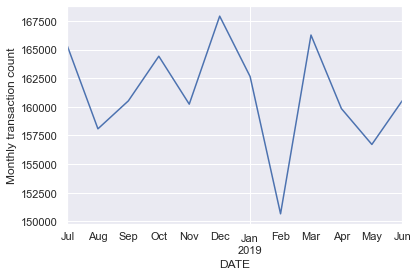

In [85]:
monthly_plot = monthly['TOT_SALES'].resample('M').sum()
monthly_plot.plot()
plt.ylabel('Monthly transaction count')

The number of transactions have peaked during the month of december. On the contrary it has taken a steep plunge in the month of February. 
- Taking a further look into the date of the transactions.

<AxesSubplot:xlabel='DATE'>

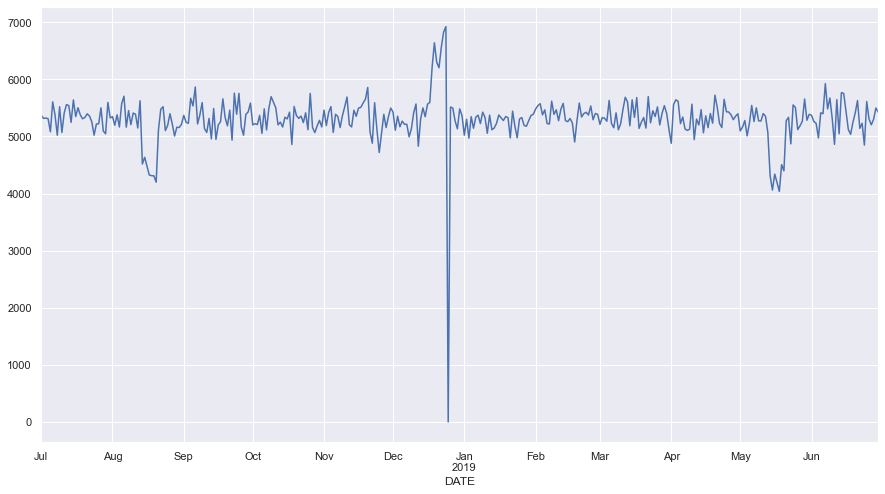

In [86]:
plt.figure(figsize=(15,8))
by_week = monthly['TOT_SALES'].resample('D').sum()
by_week.plot()

In [87]:
#taking a closer look at the peak between December and January
dec_jan = monthly[monthly.index.month.isin([12])]
dec_jan

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES,WEIGHT,PRODUCT,LIFESTAGE,PREMIUM_CUSTOMER,BRAND
DATE,,,,,,,,,,,
2018-12-12,4,4074,2980,4,2,13.0,380,Dorito Corn Chp Supreme,MIDAGE SINGLES/COUPLES,Budget,DORITOS
2018-12-28,9,9208,8633,24,2,7.2,210,Grain Waves Sweet Chilli,MIDAGE SINGLES/COUPLES,Budget,GRNWVES
2018-12-18,13,13213,12448,53,2,6.0,165,RRD Sweet Chilli & Sour Cream,MIDAGE SINGLES/COUPLES,Budget,RRD
2018-12-26,19,19272,16684,59,1,5.1,300,Old El Paso Salsa Dip Tomato Med,MIDAGE SINGLES/COUPLES,Budget,OLD
2018-12-20,23,23067,19159,68,2,7.4,134,Pringles Chicken Salt Crips,MIDAGE SINGLES/COUPLES,Budget,PRINGLES
...,...,...,...,...,...,...,...,...,...,...,...
2018-12-20,268,268315,264753,55,1,1.7,90,Snbts Whlgrn Crisps Cheddr&Mstrd,YOUNG SINGLES/COUPLES,Premium,SUNBITES
2018-12-01,269,269204,266270,58,2,5.4,150,Red Rock Deli Chikn&Garlic Aioli,YOUNG SINGLES/COUPLES,Premium,RRD
2018-12-18,270,270002,266609,26,2,7.4,134,Pringles Sweet&Spcy BBQ,YOUNG SINGLES/COUPLES,Premium,PRINGLES


<AxesSubplot:xlabel='DATE'>

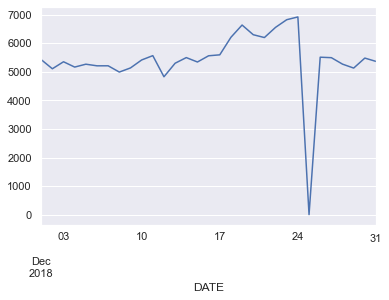

In [88]:
dec_jan['TOT_SALES'].resample('D').sum().plot()

The peak has reached just before what seems to be Christmas eve and has plummeted a day or 2 later, resuming concorse the days following the plunge.
- This shows that sales is the highest before an auspicious day and not on the day per se. 

# Summary 

From the analysis plotted above, the category of 'OLDER FAMILIES' have made the highest number of transactions and over 20000 of the those made by the same belong to the 'Budget' premium_category. 
- Older singles/couples are potentially equal to its predecessor. This category consists of customers who belong to all the premium categories fairly equally (approx over 17000).

The exploratory data analysis conducted above for the dataset presented by Quantium generates quite a lot of helpful data on customer behaviour. 
- The data exhibits that potential customers belong the most to 'older families','Young couples/singles' and 'Retirees', who've made the highest number of transactions so far.

Premium membership:
- Majority of the Older family customers belong to the 'Budget' category. 
- Number of customers in the Mainstream membership category are a majority with about 100000. 
- Consequently, the customer demographic for the Mainstream category belong to the following with over 20000 customers.:
-- 'Young singles/couples'
-- 'Retirees' 
- The proportion of each membership type generated above shows that majority of customers in every lifestage category belong to the Budget and Premium membership. 


Brand popularity:
- The most popular brand from the count in transactions is 'Kettle Mozzarella   Basil & Pesto' with a weight of 175g. Although there are other chip brands which differ with just a handful of transactions, this one seems to be the most popular one amongst youth and old alike.
- The most popular brand amongst the young population is TYRRELLS with the least popular being BURGER RINGS. 

Favoured pack size: 
- The young population has purchased pack sizes of 270g with a likelihood of 27.7%.
- The brand that sells 270g packsize chips - TWISTIES

In [89]:
quantity.to_csv('transaction_data_mining.csv')

In [90]:
transactions.to_csv('transactions.csv')